In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
y = np.zeros(3)
y[1]=y[0]
y[0] = 4
print(y[1])

0.0


In [123]:
def simulate(Y0, y0, b, sigma, x, w, N, n, T):
    dt = T / n
    Y = np.zeros((n, N))
    Y[0] = Y0.copy()
    ones = np.ones(N)

    for i in range(1, n):
        drift = -np.diag(x) @ (Y[i-1] - y0)
        global_drift = b(np.dot(w, Y[i-1])) * ones
        noise = sigma(np.dot(w, Y[i-1])) * np.sqrt(dt) * ones * np.random.randn()
        Y[i] = Y[i-1] + drift * dt + global_drift * dt + noise

    return Y


### Modèle multifacteur à racine carrée

$$d \textbf{V}_t^N = - \text{diag} (\textbf{x})(\textbf{V}_t^N-v_0) dt + (\theta - \lambda \textbf{w}^{\top}\textbf{V}_t^N)\mathbb{1} dt + \nu \sqrt{\textbf{w}^{\top} \textbf{V}_t^N} \mathbb{1} dW_t$$

$$b(x)=\theta - \lambda x, \ \ \ \sigma (x) = \nu \sqrt{x}$$

In [144]:
N = 2
x = np.array([1, 10])
w = np.array([1, 2])
lam = 0.3
nu = 0.3
V0 = 0.02
theta = 0.02
T = 1
v0 = V0 / (2 * (w[0]/x[0] + w[1]/x[1])) * (1/x)
n = 10**3
V_0 = v0

In [156]:
def b(x):
    return theta - lam * x

def sigma(x):
    return nu * np.sqrt(np.maximum(x, 0))

In [157]:
V = simulate(V_0, v0, b, sigma, x, w, N, n, T)

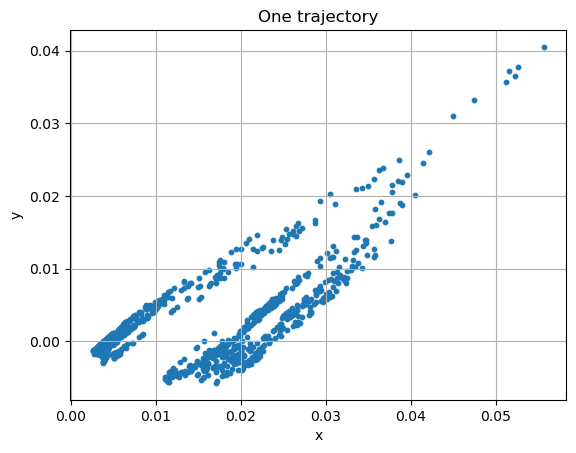

In [159]:
plt.scatter(V[:, 0], V[:, 1], s=10) 

plt.xlabel("x")
plt.ylabel("y")
plt.title("One trajectory")
plt.grid(True)
plt.show()


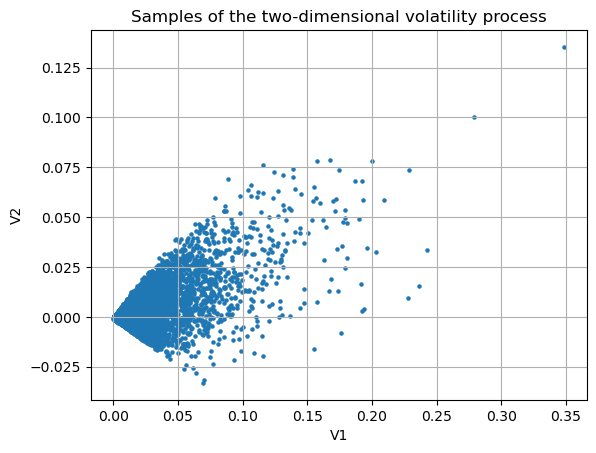

In [150]:
# Paramètres
num_simulations = 10000

results = []

for _ in range(num_simulations):
    V = simulate(V_0, v0, b, sigma, x, w, N, n, T)
    results.append(V[-1])  # on garde le dernier point

results = np.array(results)

plt.scatter(results[:, 0], results[:, 1], s=10)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Samples of the two-dimensional volatility process")
plt.grid(True)
plt.show()